# 1. Importing Libraries

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import RandomizedSearchCV

In [111]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# 2. Imporitng Dataset

In [112]:
# Load the dataset
df = pd.read_csv('Housing.csv')

# 3. Analysing Dataset

In [113]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Print the column names
print("\nColumns in the dataset:")
print(df.columns)

# Check the shape (size) of the dataset
print("\nSize of the dataset (rows, columns):")
print(df.shape)

# Get an overview of the dataset (data types, non-null counts, etc.)
print("\nBasic information about the dataset:")
print(df.info())

# Get a summary of the dataset for numerical columns
print("\nStatistical summary of numerical columns:")
print(df.describe())

First few rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Columns in the dataset:
Index(['price', 'area', 'bedrooms', 'bathro

# 4. Checking for Missing Values

In [114]:
# Check for missing values
print("\nMissing values in the dataset:")
print(df.isnull().sum())


Missing values in the dataset:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


# 5. Features Categorised

In [115]:
# Function to categorize columns
def categorize_columns(df):
    numerical = []
    boolean = []
    categorical = []

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            numerical.append(col)
        elif pd.api.types.is_bool_dtype(df[col]) or df[col].nunique() == 2:
            boolean.append(col)
        else:
            categorical.append(col)

    print("Numerical Columns: ", numerical)
    print("Boolean (Yes/No) Columns: ", boolean)
    print("Categorical Columns: ", categorical)

# Call the function
categorize_columns(df)

Numerical Columns:  ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Boolean (Yes/No) Columns:  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
Categorical Columns:  ['furnishingstatus']


# 6. Outlier

## 6.1. Outlier Detection

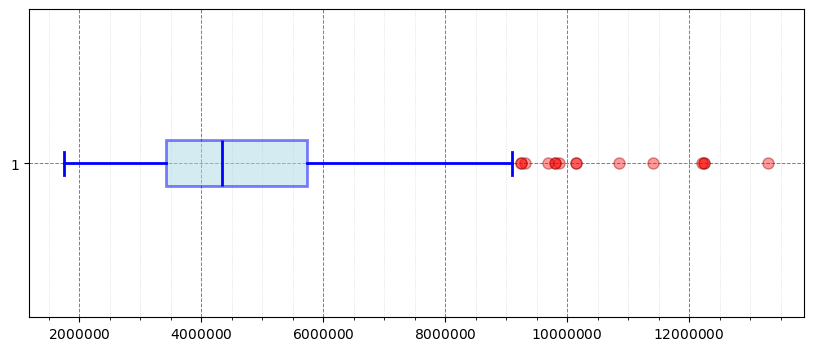

In [116]:
# Extract the 'Price' column into a list from the dataframe
data = df['price'].tolist()

# Create a box plot with customized aesthetics and fill color
plt.figure(figsize=(10, 4))

# Customizing the box plot with filled boxes
boxprops = dict(facecolor='lightblue', color='blue', linewidth=2, alpha=0.5)
whiskerprops = dict(color='blue', linewidth=2)
capprops = dict(color='blue', linewidth=2)
medianprops = dict(color='blue', linewidth=2)
flierprops = dict(marker='o', markerfacecolor='red', markeredgecolor='darkred', alpha=0.4, markersize=8, linestyle='none')

plt.boxplot(data, vert=False, patch_artist=True,
            boxprops=boxprops, whiskerprops=whiskerprops, capprops=capprops,
            medianprops=medianprops, flierprops=flierprops)

ax = plt.gca()
ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='plain', axis='x')

# Adding grid
plt.grid(True, which='major', linestyle='--', linewidth=0.7, color='gray')
plt.minorticks_on()
plt.grid(True, which='minor', linestyle=':', linewidth=0.5, color='lightgray')

# Display the plot
plt.show()

## 6.2. Outlier Removal

In [117]:
# Calculate the IQR to identify and remove outliers in the 'Price' column
Q1 = df['price'].quantile(0.20)
Q3 = df['price'].quantile(0.80)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_clean = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Display the cleaned data
print("Cleaned Data Size without Outliers:")
print(df_clean.shape)

# Save the cleaned data to a new CSV file
df_clean.to_csv('Cleaned_Data.csv', index=False)

print("Cleaned data saved to 'Cleaned_Data.csv'")

Cleaned Data Size without Outliers:
(539, 13)
Cleaned data saved to 'Cleaned_Data.csv'


# 7. Visualizing Features

## 7.1. Numerical Features

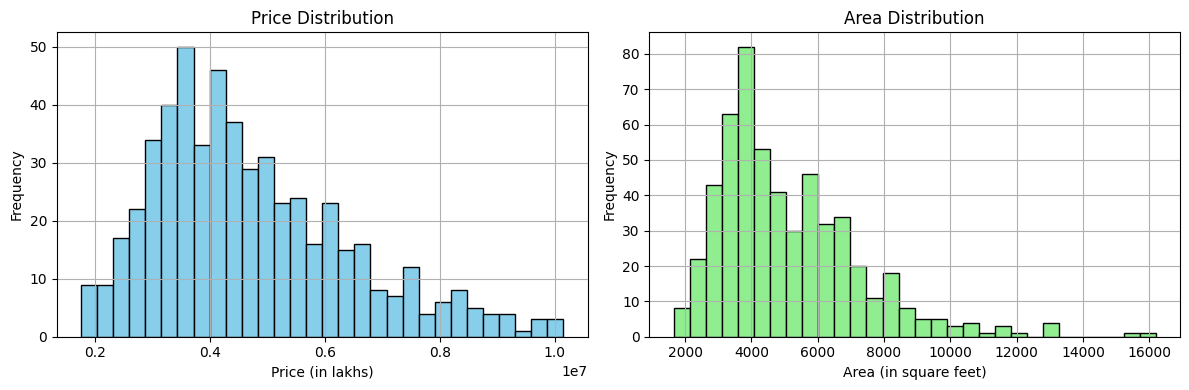

In [118]:
data = pd.read_csv('Cleaned_Data.csv')
# Convert 'yes'/'no' to 1/0 for binary variables
binary_vars = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for var in binary_vars:
    data[var] = data[var].map({'yes': 1, 'no': 0})

# Create histograms for price and area side by side with smaller sizes and grid
plt.figure(figsize=(12, 4))

# Histogram for Price
plt.subplot(1, 2, 1)
plt.hist(data['price'], bins=30, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price (in lakhs)')
plt.ylabel('Frequency')
plt.grid(True)

# Histogram for Area
plt.subplot(1, 2, 2)
plt.hist(data['area'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Area Distribution')
plt.xlabel('Area (in square feet)')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()


## 7.2. Boolean Features

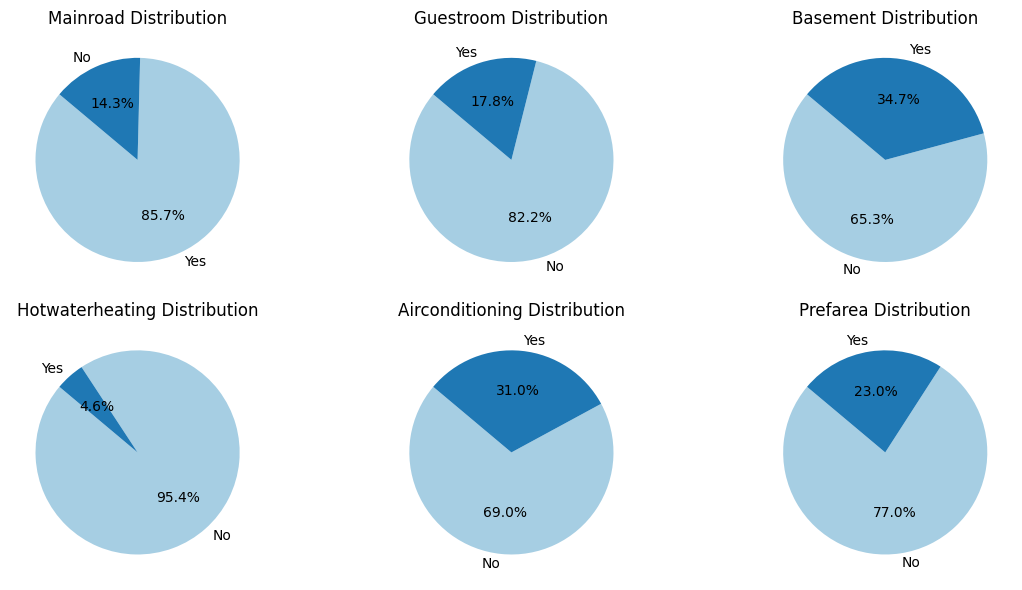

In [119]:
# Create separate pie charts for each binary variable side by side with grid
fig, axes = plt.subplots(2, 3, figsize=(12, 6))
axes = axes.ravel()

for i, var in enumerate(binary_vars):
    counts = data[var].value_counts()
    axes[i].pie(counts, labels=counts.index.map({0: 'No', 1: 'Yes'}), autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    axes[i].set_title(f'{var.capitalize()} Distribution')

plt.tight_layout()
plt.show()

## 7.3. Integer Features

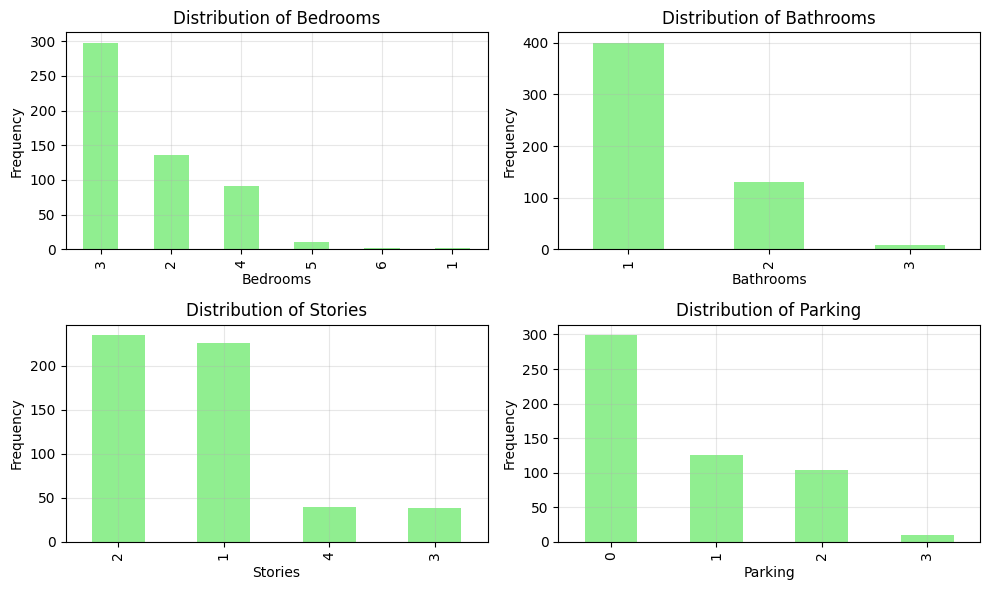

In [120]:
# Create bar plots for bedrooms, bathrooms, stories, and parking in a 2x2 layout with grid
plt.figure(figsize=(10, 6))

features_to_plot = ['bedrooms', 'bathrooms', 'stories', 'parking']

for i, feature in enumerate(features_to_plot):
    plt.subplot(2, 2, i + 1)
    data[feature].value_counts().plot(kind='bar', color='lightgreen')

    plt.title(f'Distribution of {feature.capitalize()}')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 7.4. Categorcial Feature

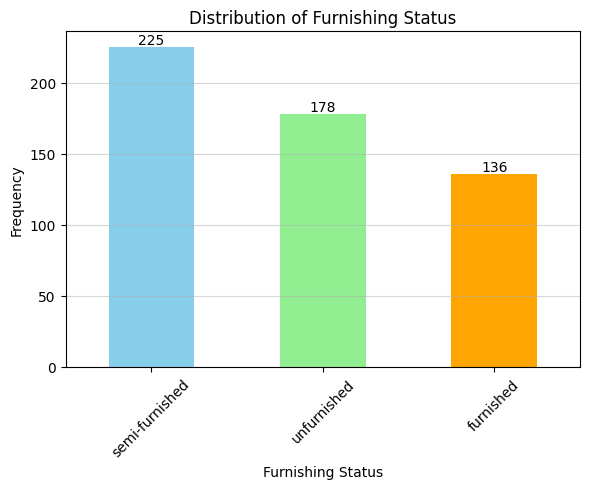

In [121]:
# Bar plot for Furnishing Status with grid
plt.figure(figsize=(6, 5))
ax = data['furnishingstatus'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen', 'orange'])
plt.title('Distribution of Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Frequency')

# Add numbers above the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=10, color='black')

# Tilt x-axis labels and add grid
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)

plt.tight_layout()
plt.show()

## 7.5. Distribution of Dependent Variable

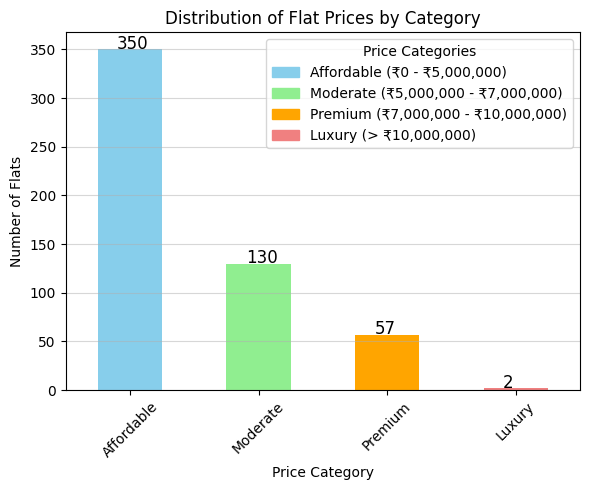

In [122]:
data_copy = data.copy()

# Define the price categories
bins = [0, 5000000, 7000000, 10000000, float('inf')]
labels = ['Affordable', 'Moderate', 'Premium', 'Luxury']
labels1 = ['Affordable (₹0 - ₹5,000,000)', 'Moderate (₹5,000,000 - ₹7,000,000)', 'Premium (₹7,000,000 - ₹10,000,000)', 'Luxury (> ₹10,000,000)']

# Create a new column for categories in the copied DataFrame
data_copy['Category'] = pd.cut(data_copy['price'], bins=bins, labels=labels, right=False)

# Count the number of occurrences in each category
category_counts = data_copy['Category'].value_counts()

# Define colors for each category
colors = ['skyblue', 'lightgreen', 'orange', 'lightcoral']

# Plotting
plt.figure(figsize=(6, 5))
bars = category_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Flat Prices by Category')
plt.xlabel('Price Category')
plt.ylabel('Number of Flats')
plt.xticks(rotation=45)
plt.grid(axis='y',alpha=0.5)

# Adding frequency labels above the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.5,
             int(bar.get_height()), fontsize=12)

# Adding the legend
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=color) for color in colors],
           labels=labels1, title="Price Categories", loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

# 8. Correlation Analysis

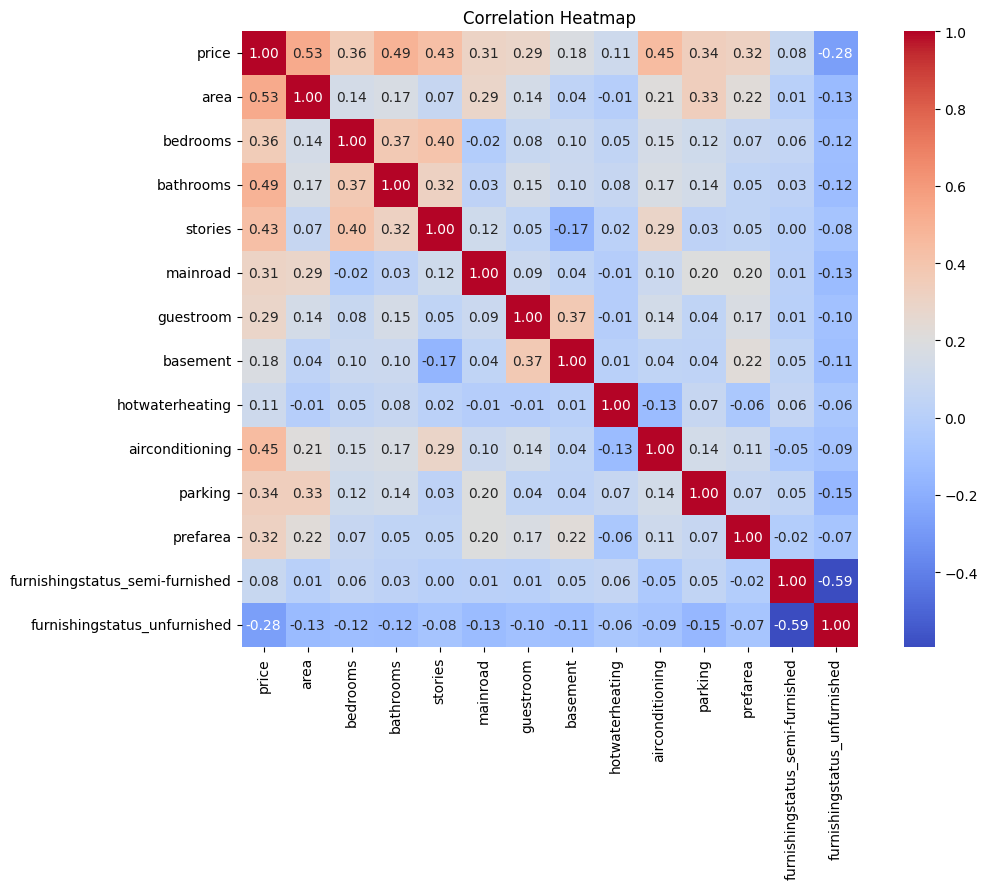

In [123]:
# Create a copy of the original DataFrame
data_copy = data.copy()

# Convert binary columns to numerical values (boolean encoding)
binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
data_copy[binary_columns] = data_copy[binary_columns].replace({'yes': 1, 'no': 0})

# One-hot encoding for the categorical variable 'furnishingstatus'
data_copy = pd.get_dummies(data_copy, columns=['furnishingstatus'], drop_first=True)

# Standardize numerical features
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
scaler = MinMaxScaler()
data_copy[numerical_columns] = scaler.fit_transform(data_copy[numerical_columns])

# Calculate the correlation matrix
correlation_matrix = data_copy.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# 9. Feature Importance

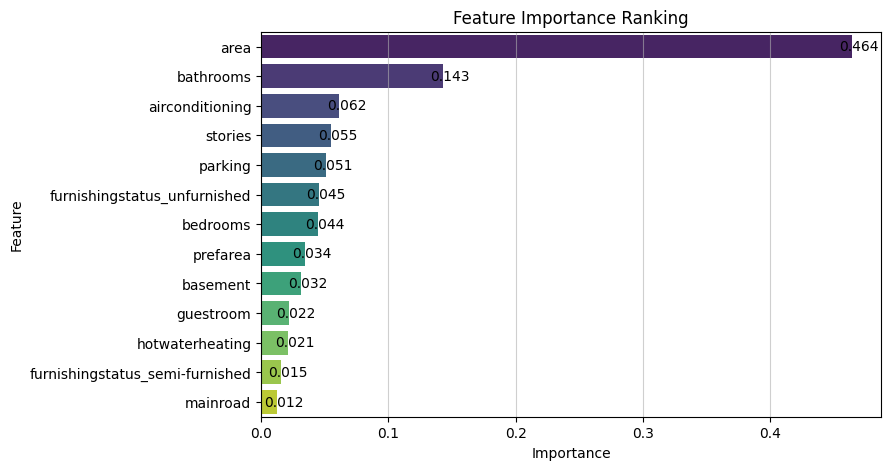

In [124]:
# Define features and target variable
X = data_copy.drop('price', axis=1)
y = data_copy['price']

# Fit a Random Forest model
model = RandomForestRegressor(random_state=77)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances with value annotations and grid
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

# Add value annotations on each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_width():.3f}',
                      (p.get_width(), p.get_y() + p.get_height() / 2),
                      ha='center', va='center',
                      fontsize=10, color='black',
                      xytext=(5, 0),
                      textcoords='offset points')

plt.title('Feature Importance Ranking')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='-', alpha=0.6)
plt.show()

We remove 'bedrooms' as it has high correlation with 'stories' but 'stories' has higher feature importance

In [125]:
feature_importance_df = feature_importance_df[feature_importance_df['Feature'] != 'bedrooms']

In [126]:
# Print the top 10 features
print("Top 10 Features:")
print(feature_importance_df.head(10))

Top 10 Features:
                         Feature  Importance
0                           area    0.464153
2                      bathrooms    0.142730
8                airconditioning    0.061558
3                        stories    0.054644
9                        parking    0.050888
12  furnishingstatus_unfurnished    0.045429
10                      prefarea    0.034352
6                       basement    0.031529
5                      guestroom    0.021606
7                hotwaterheating    0.021178


# 10. Models

## 10.1. Encoding Categorical Data

In [127]:
data = pd.read_csv('Cleaned_Data.csv')

data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)

binary_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in binary_columns:
    data[col] = data[col].map({'yes': 1, 'no': 0})

## 10.2. Normalizing Data

In [128]:
scaler = MinMaxScaler()
numerical_columns = ['price', 'area', 'bathrooms', 'stories', 'parking']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

## 10.3. Train-Test Split

In [129]:
X = data.drop(['price', 'bedrooms', 'mainroad'], axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 10.4. Regressors

In [130]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'K-Neighbors': KNeighborsRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}

## 10.5. Performance Metrics

In [131]:
results = {
    'MAE': [],
    'RMSE': [],
    'R-squared': []
}

## 10.6. Training and Testing Models

In [132]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)

    results['MAE'].append(mae)
    results['RMSE'].append(rmse)
    results['R-squared'].append(r2)

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results, index=models.keys())
print(results_df)

                        MAE      RMSE  R-squared
Linear Regression  0.091902  0.124673   0.714003
Random Forest      0.092873  0.132536   0.676786
Decision Tree      0.146443  0.205326   0.224270
K-Neighbors        0.126443  0.168369   0.478391
Gradient Boosting  0.093213  0.125938   0.708168
XGBoost            0.104806  0.148208   0.595828


# 11. Hyperparameter Tuning

## 11.1. Linear Regression

In [133]:
# Define the parameter grid for Linear Regression
linear_regression_params = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1],
    'positive': [True, False]
}

In [134]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Set up RandomizedSearchCV for Linear Regression
lr_search = RandomizedSearchCV(
    estimator=lr_model,
    param_distributions=linear_regression_params,
    n_iter=100,
    scoring='r2',
    cv=10,
    random_state=42
)

In [135]:
# Fit the search to the training data
print("Optimizing Linear Regression...")
lr_search.fit(X_train, y_train)
print("Best parameters for Linear Regression:", lr_search.best_params_)
print("Best R2 score for Linear Regression on training set:", lr_search.best_score_)

Optimizing Linear Regression...


c:\Users\baijn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=100. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Linear Regression: {'positive': False, 'n_jobs': None, 'fit_intercept': True, 'copy_X': True}
Best R2 score for Linear Regression on training set: 0.5750841444842748


In [136]:
# Evaluate the best Linear Regression model on the test set
lr_best_model = lr_search.best_estimator_
lr_test_r2 = r2_score(y_test, lr_best_model.predict(X_test))

print(f"\nLinear Regression R2 on test set: {lr_test_r2:.4f}")


Linear Regression R2 on test set: 0.7140


## 11.2. Gradient Boosting

In [137]:
# Define the parameter grid for Gradient Boosting
gradient_boosting_params = {
    'n_estimators': [50, 100, 200, 300, 400],
    'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2],
    'max_depth': [2, 3, 4, 5, 6, 7],
    'subsample': [0.2, 0.4, 0.6, 0.8, 1.0]
}

In [138]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=77)

# Set up RandomizedSearchCV for Gradient Boosting
gb_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=gradient_boosting_params,
    n_iter=20,
    scoring='r2',
    cv=10,
    random_state=77
)

In [139]:
# Fit the search to the data
print("Optimizing Gradient Boosting Regressor...")
gb_search.fit(X_train, y_train)
print("Best parameters for Gradient Boosting:", gb_search.best_params_)
print("Best R2 score for Gradient Boosting:", gb_search.best_score_)

Optimizing Gradient Boosting Regressor...
Best parameters for Gradient Boosting: {'subsample': 0.2, 'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.01}
Best R2 score for Gradient Boosting: 0.5754609740919168


In [140]:
# Evaluate the best model on the test set
gb_best_model = gb_search.best_estimator_

print("\nTest set performance:")
gb_test_r2 = r2_score(y_test, gb_best_model.predict(X_test))

print(f"Gradient Boosting R2 on test set: {gb_test_r2:.4f}")


Test set performance:
Gradient Boosting R2 on test set: 0.7353


## 11.3. Random Forest

In [141]:
# Define the parameter grid for Random Forest
random_forest_params = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [2, 3, 4, 5, 6],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [142]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=77)

# Set up RandomizedSearchCV for Random Forest
rf_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=random_forest_params,
    n_iter=20,
    scoring='r2',
    cv=10,
    random_state=77
)

In [143]:
# Fit the search to the data
print("Optimizing Random Forest Regressor...")
rf_search.fit(X_train, y_train)
print("Best parameters for Random Forest:", rf_search.best_params_)
print("Best R2 score for Random Forest:", rf_search.best_score_)

Optimizing Random Forest Regressor...
Best parameters for Random Forest: {'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 6, 'bootstrap': True}
Best R2 score for Random Forest: 0.5200818574084021


In [144]:
# Evaluate the best model on the test set
rf_best_model = rf_search.best_estimator_

print("\nTest set performance:")
rf_test_r2 = r2_score(y_test, rf_best_model.predict(X_test))

print(f"Random Forest R2 on test set: {rf_test_r2:.4f}")


Test set performance:
Random Forest R2 on test set: 0.6765


# 12. Performance of Tuned Models

In [145]:
# Calculate the MAE and RMSE for each model
lr_mae = mean_absolute_error(y_test, lr_best_model.predict(X_test))
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_best_model.predict(X_test)))

gb_mae = mean_absolute_error(y_test, gb_best_model.predict(X_test))
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_best_model.predict(X_test)))

rf_mae = mean_absolute_error(y_test, rf_best_model.predict(X_test))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_best_model.predict(X_test)))

In [146]:
results = pd.DataFrame({
    'Model': ['Gradient Boosting', 'Linear Regression', 'Random Forest'],
    'MAE': [round(gb_mae, 2), round(lr_mae, 2), round(rf_mae, 2)],
    'RMSE': [round(gb_rmse, 2), round(lr_rmse, 2), round(rf_rmse, 2)],
    'R-squared': [round(gb_test_r2, 2), round(lr_test_r2, 2), round(rf_test_r2, 2)]
})

# Display the results
print(results.to_string(index=False))

            Model  MAE  RMSE  R-squared
Gradient Boosting 0.09  0.12       0.74
Linear Regression 0.09  0.12       0.71
    Random Forest 0.10  0.13       0.68
